## Analysis of Options Data During the "Great Recession"

In [74]:
from pathlib import Path
from warnings import simplefilter
from math import isnan

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

data_dir = Path("~/datasets/TradingData")
options_col_names = ["UnderlyingSymbol", "UnderlyingPrice", "Exchange", "OptionSymbol", "Blank", "Type", 
                     "Expiration", " DataDate", "Strike", "Last", "Bid", "Ask", "Volume", "OpenInterest", 
                     "IV", "Delta", "Gamma", "Theta", "Vega", "Alias"]

stockquotes_col_names = ["symbol", "quotedate", "open", "high", "low", "close", "volume", "avg"]
optionstats_col_names = ["symbol", "quotedate", "iv30call", "iv30put", "iv30mean", "callvol", "putvol", 
                         "calloi", "putoi"]

# options_combined.csv
# optionstats_combined.csv
# stockquotes_combined.csv
# automotive
# financial

gm_options_stats = pd.read_csv(data_dir / "automotive/optionstats_combined.csv", header=None, parse_dates=[1])
gm_options_stats = gm_options_stats.rename(columns={0: 'symbol', 1: 'date'})
gm_stockquotes   = pd.read_csv(data_dir / "automotive/stockquotes_combined.csv", header=None, names=stockquotes_col_names, parse_dates=["quotedate"])
gm_stockquotes   = gm_stockquotes.set_index("quotedate")
# display(gm_options_stats.iloc[0])
# display(gm_options_stats)
# display(gm_stockquotes)
gm_options_stats = gm_options_stats.set_index('date')

### TODO 
- Get Headers
- Get NYT headlines
- Sentiment analysis on NYT headlines
- Compare with data

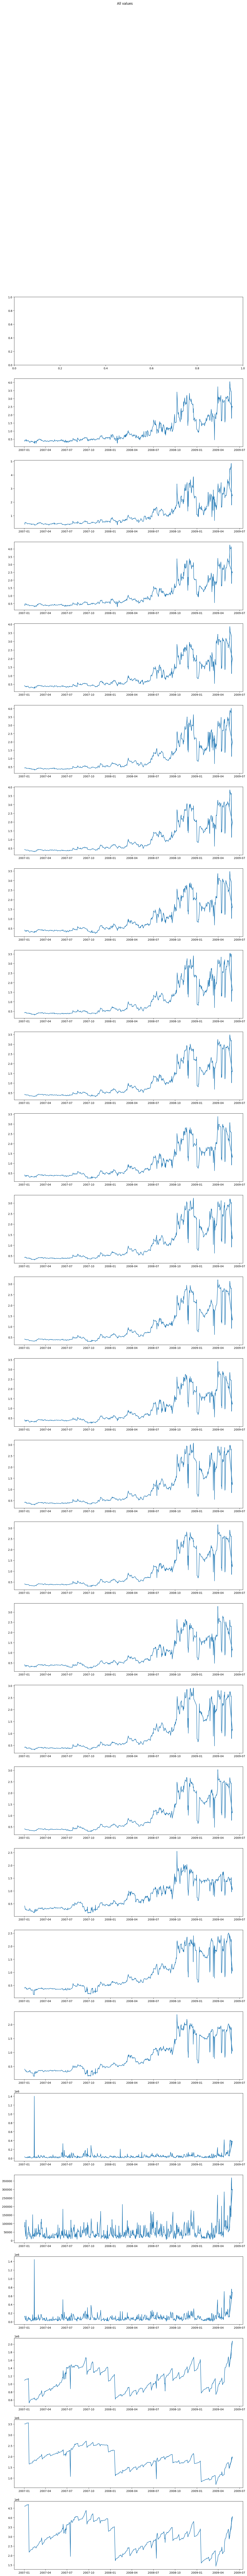

In [72]:
X = gm_options_stats.copy()
#X['day'] = X.index.dayofweek
#X['week'] = X.index.week

#X['dayofyear'] = X.index.dayofyear
#X['year'] = X.index.year
fig, axs = plt.subplots(X.shape[1])
fig.suptitle('All values')
fig.set_figheight(150)
fig.set_figwidth(15)
for col in X:
    if isinstance(col, str) and not col.isdigit():
        continue
    axs[col-1].plot(X.index, X.iloc[:, col-1])

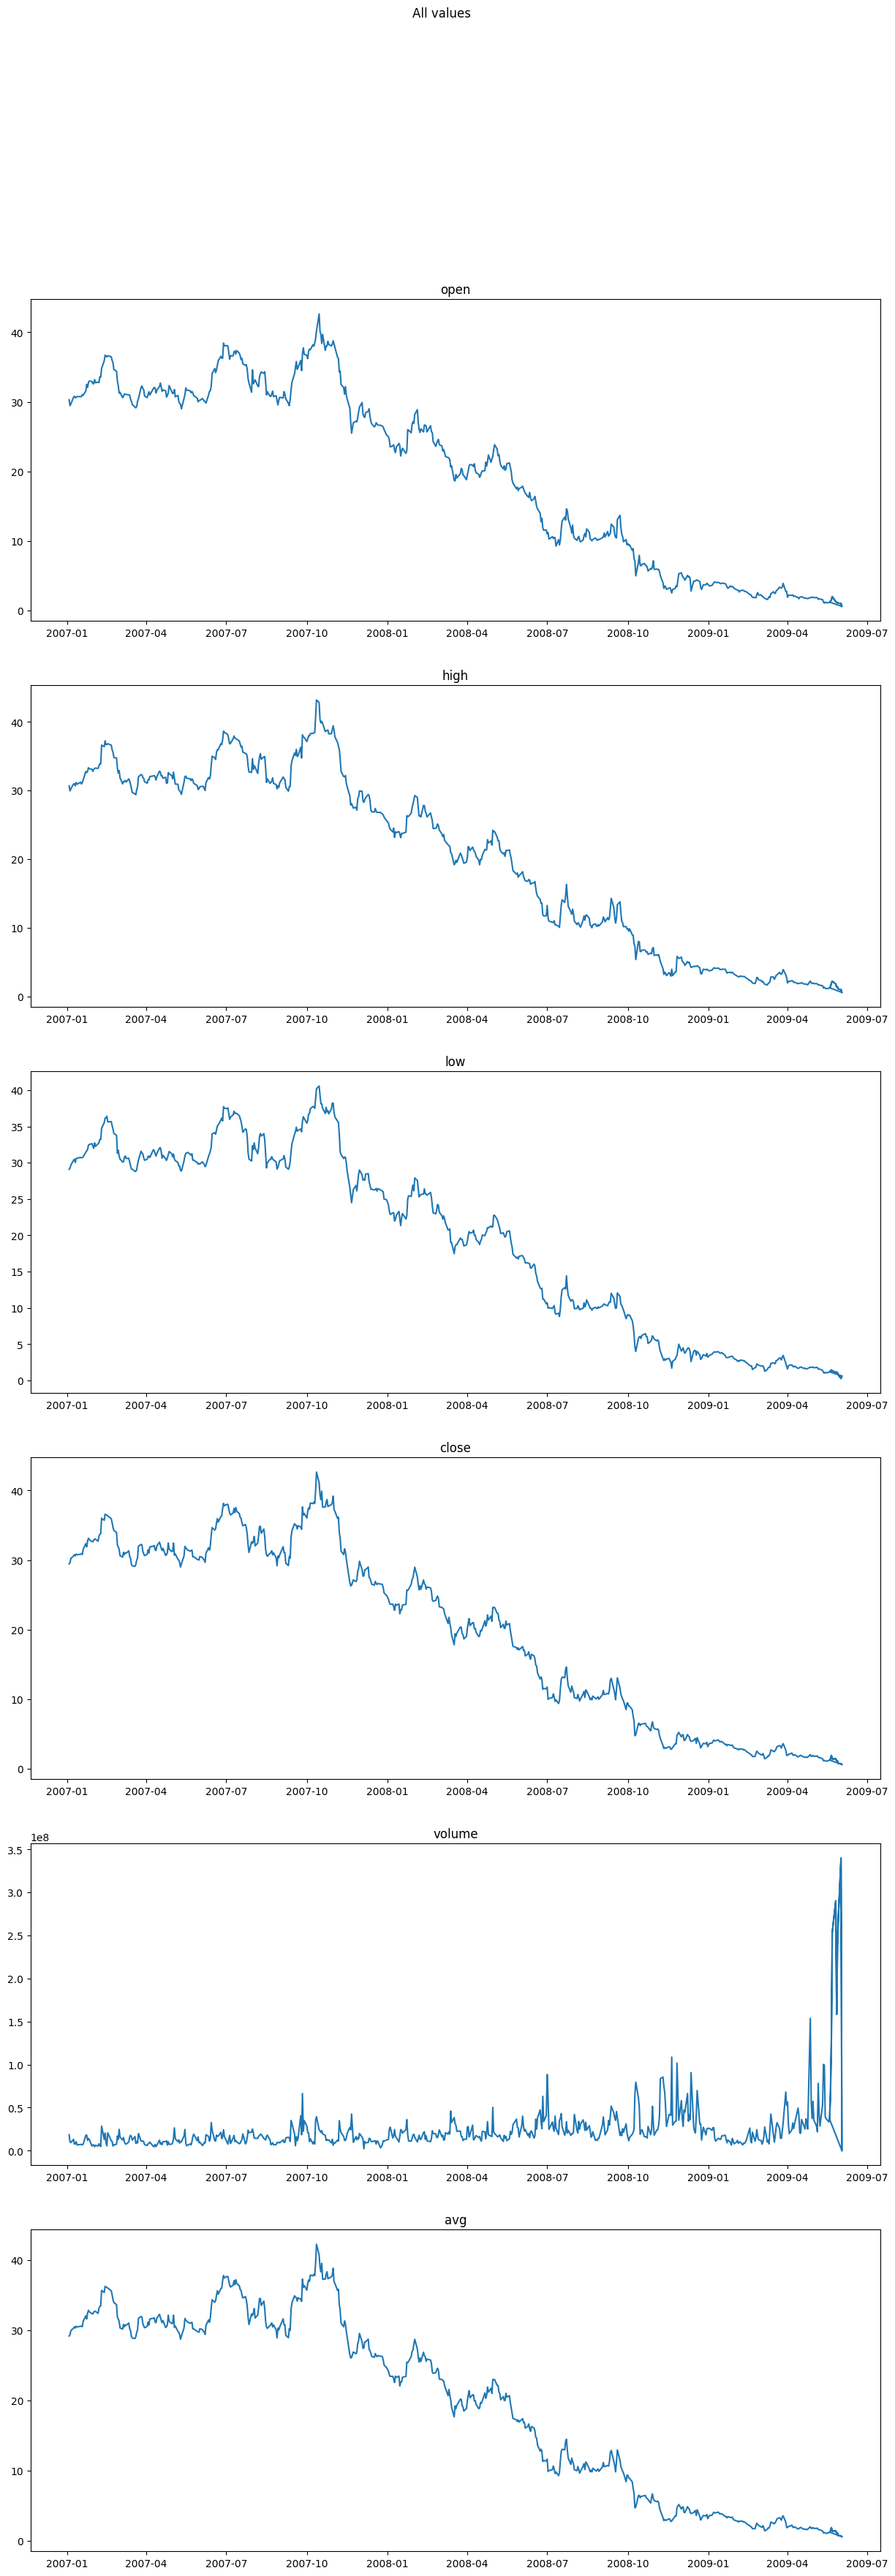

In [86]:
X = gm_stockquotes.copy()
#X['day'] = X.index.dayofweek
#X['week'] = X.index.week

#X['dayofyear'] = X.index.dayofyear
#X['year'] = X.index.year
fig, axs = plt.subplots(X.shape[1]-1)
fig.suptitle('All values')
fig.set_figheight(40)
fig.set_figwidth(15)
for (index, colname) in enumerate(X):
    if colname == "symbol":
        continue
    axs[index-1].plot(X.index, X.iloc[:, index])
    axs[index-1].set_title(colname)